In [ ]:
import subprocess

process = subprocess.Popen(["python", "-c", "import imbalanced_learn; print(imbalanced_learn.__file__)"], stdout=subprocess.PIPE)
output, err = process.communicate()

if err:
    print("Error:", err)
else:
    print("imbalanced_learn.__file__:", output.decode("utf-8").strip())


imbalanced_learn.__file__: 


In [ ]:
rm -rf <path_to_imblearn_dir>


/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `rm -rf <path_to_imblearn_dir>'


In [ ]:
import subprocess

process = subprocess.Popen(["python", "-c", "import sklearn; print(sklearn.__file__)"], stdout=subprocess.PIPE)
output, err = process.communicate()

if err:
    print("Error:", err)
else:
    print("sklearn.__file__:", output.decode("utf-8").strip())


sklearn.__file__: /usr/local/lib/python3.10/dist-packages/sklearn/__init__.py


In [ ]:
rm -rf <path_to_sklearn_dir>


/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `rm -rf <path_to_sklearn_dir>'


In [ ]:
!pip cache purge


Files removed: 4


In [ ]:
!pip install scikit-learn
!pip install imblearn


In [21]:
cd /content/drive/MyDrive/StrokeProject

/content/drive/MyDrive/StrokeProject


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import sklearn

In [23]:
train = pd.read_csv('train_2v.csv')
test = pd.read_csv('test_2v.csv')
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In the dataset we have 12 columns where 11 contains the features and the last one contains the result



In [24]:
test.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [25]:
train.shape


(43400, 12)

In [26]:
test.shape


(18601, 11)

**Data Cleaning**
Identifing missing *attributes*

In [27]:
train_missing_values=train.isnull().sum()
train_missing_values

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [28]:
test_missing_values=test.isnull().sum()
test_missing_values

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

<Axes: >

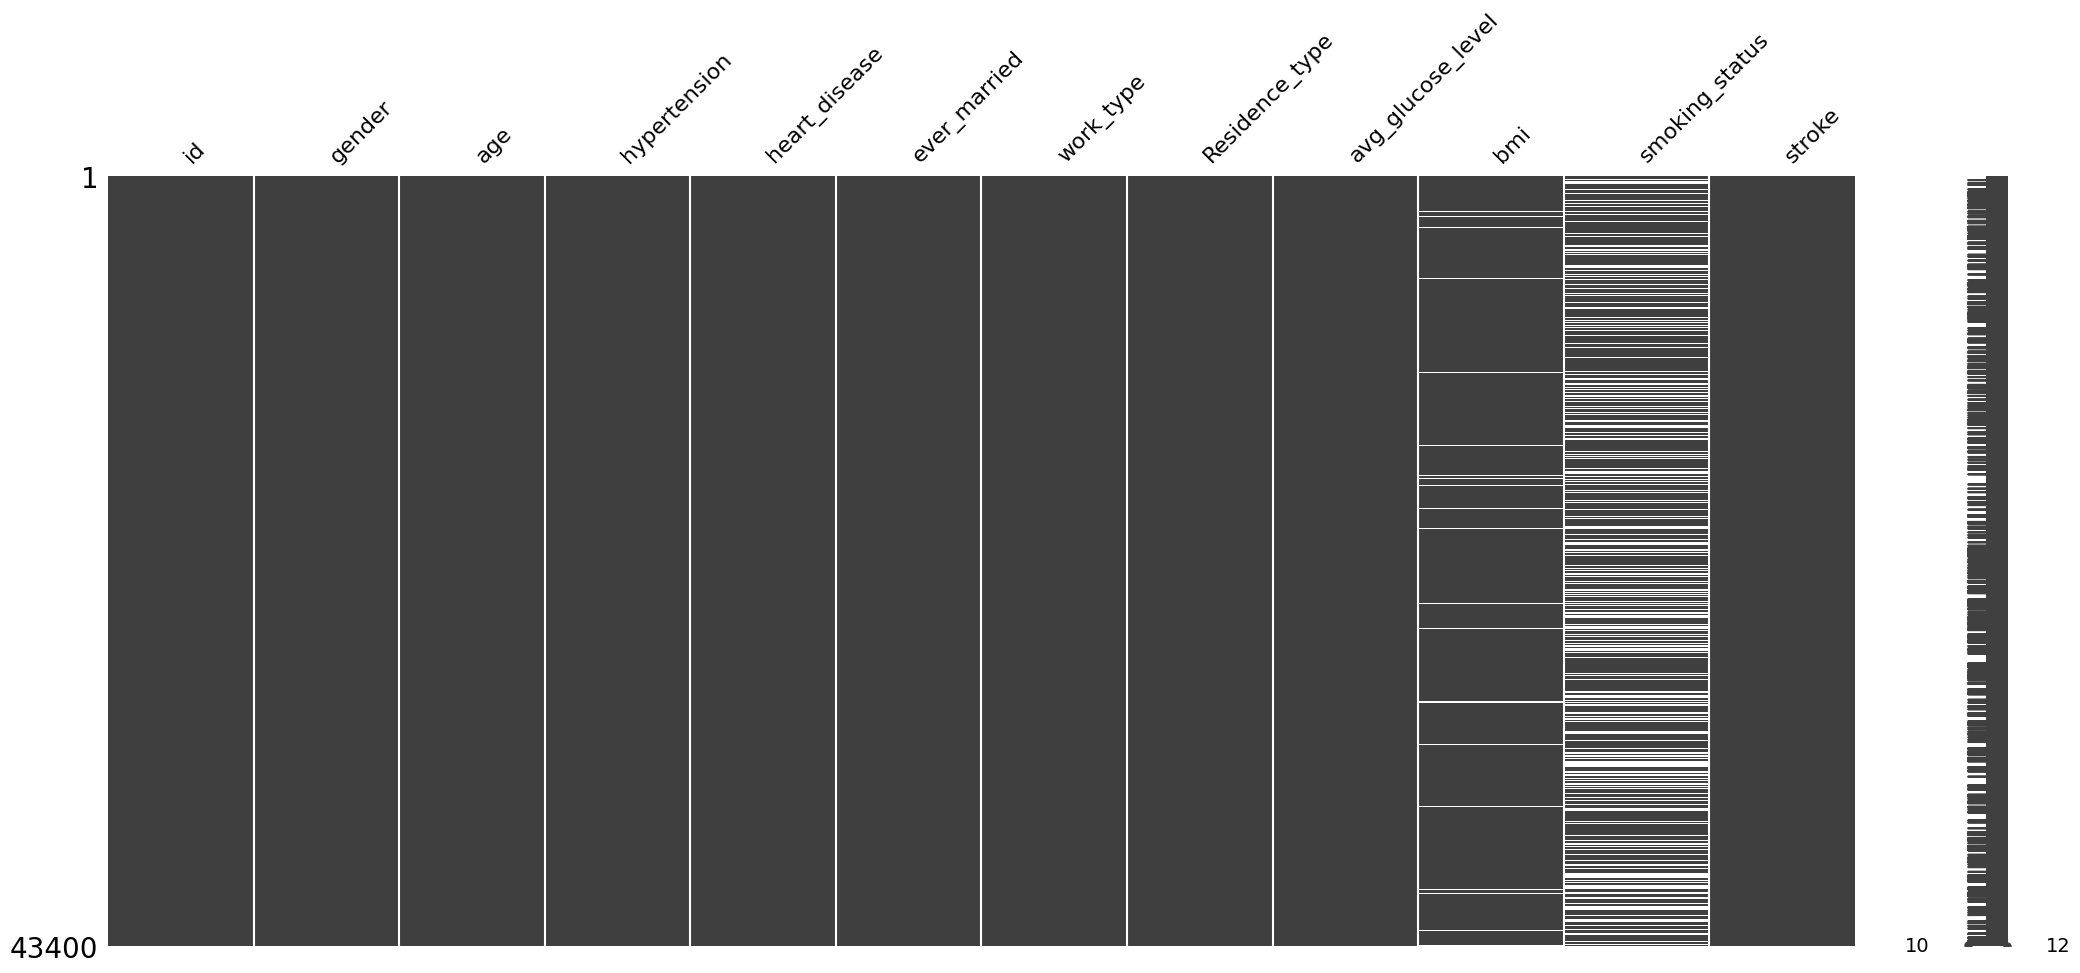

In [29]:
ms.matrix(train)


Removing missing value



In [30]:
train_data=train.dropna(axis=0,how="any")
test_data=test.dropna(axis=0,how="any")
print('train data shape: {}' .format(train_data.shape))
print('test data shape: {}' .format(test_data.shape))

train data shape: (29072, 12)
test data shape: (12423, 11)


<Axes: >

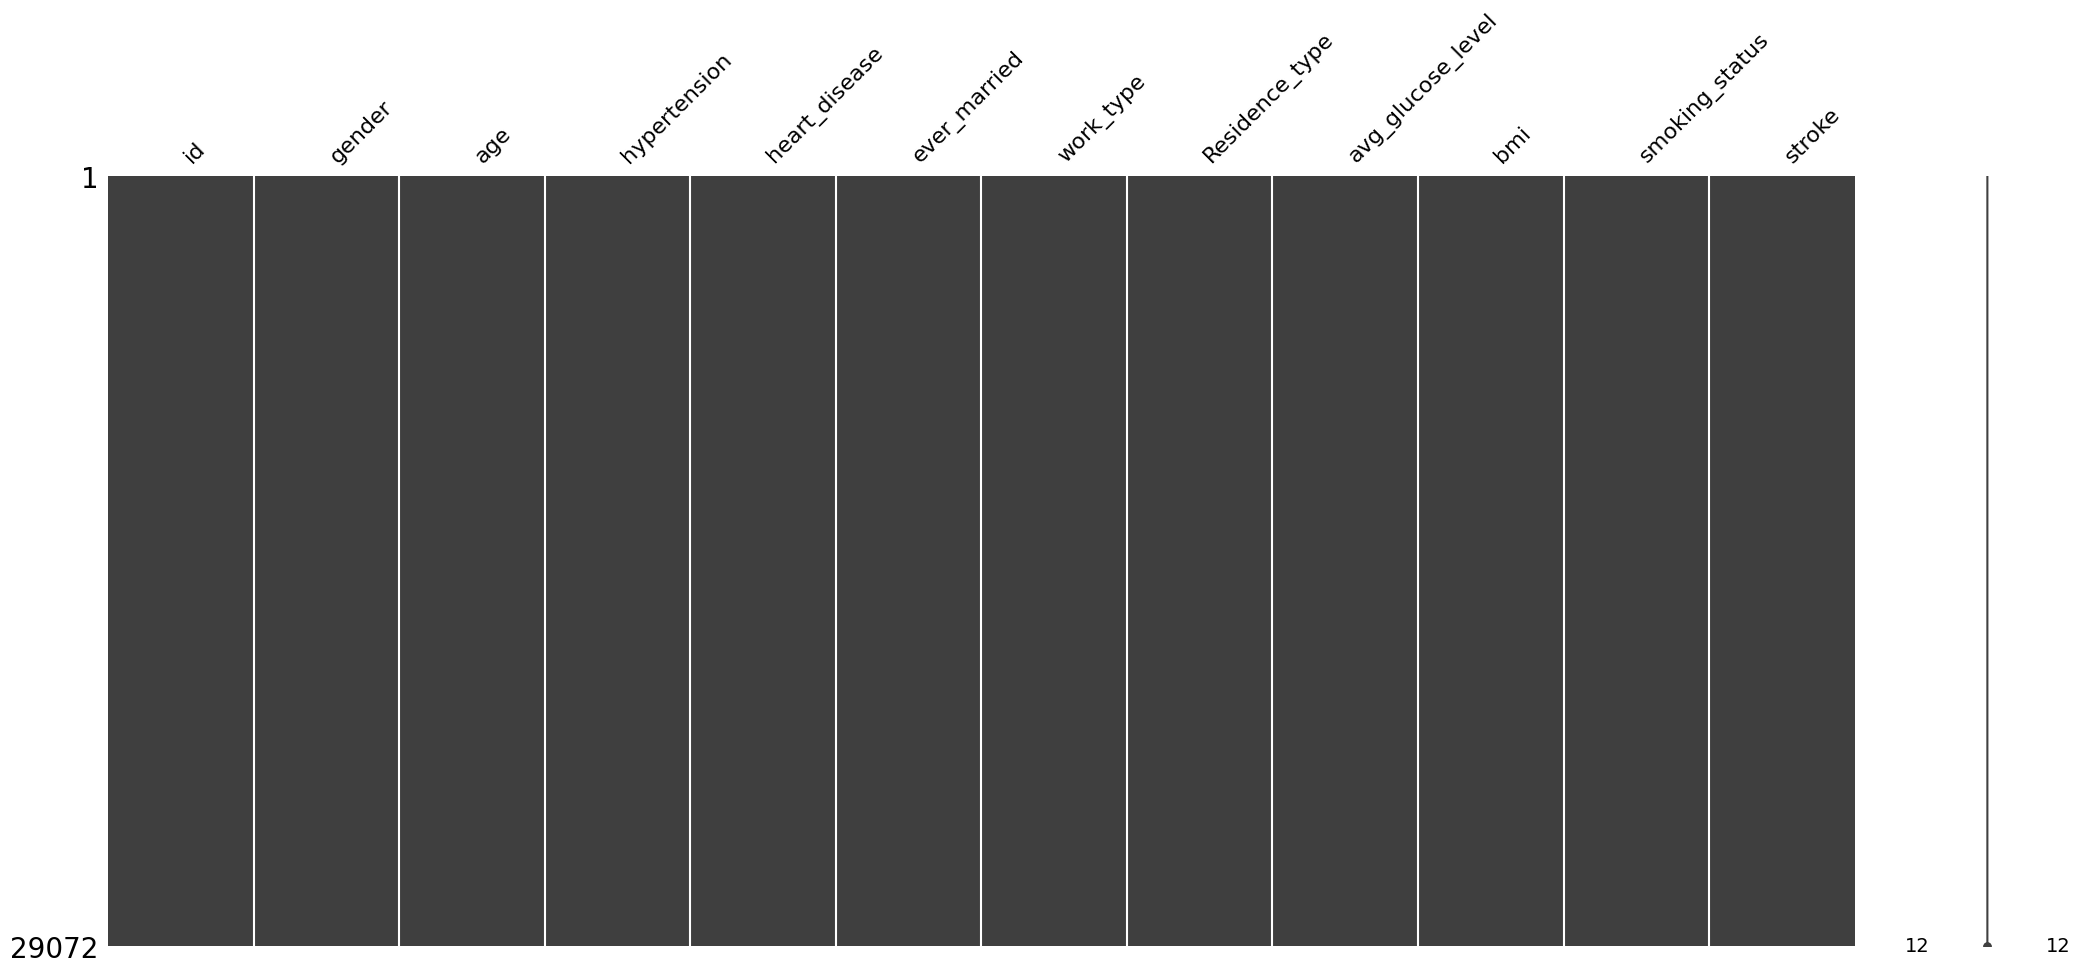

In [31]:
ms.matrix(train_data)


<Axes: >

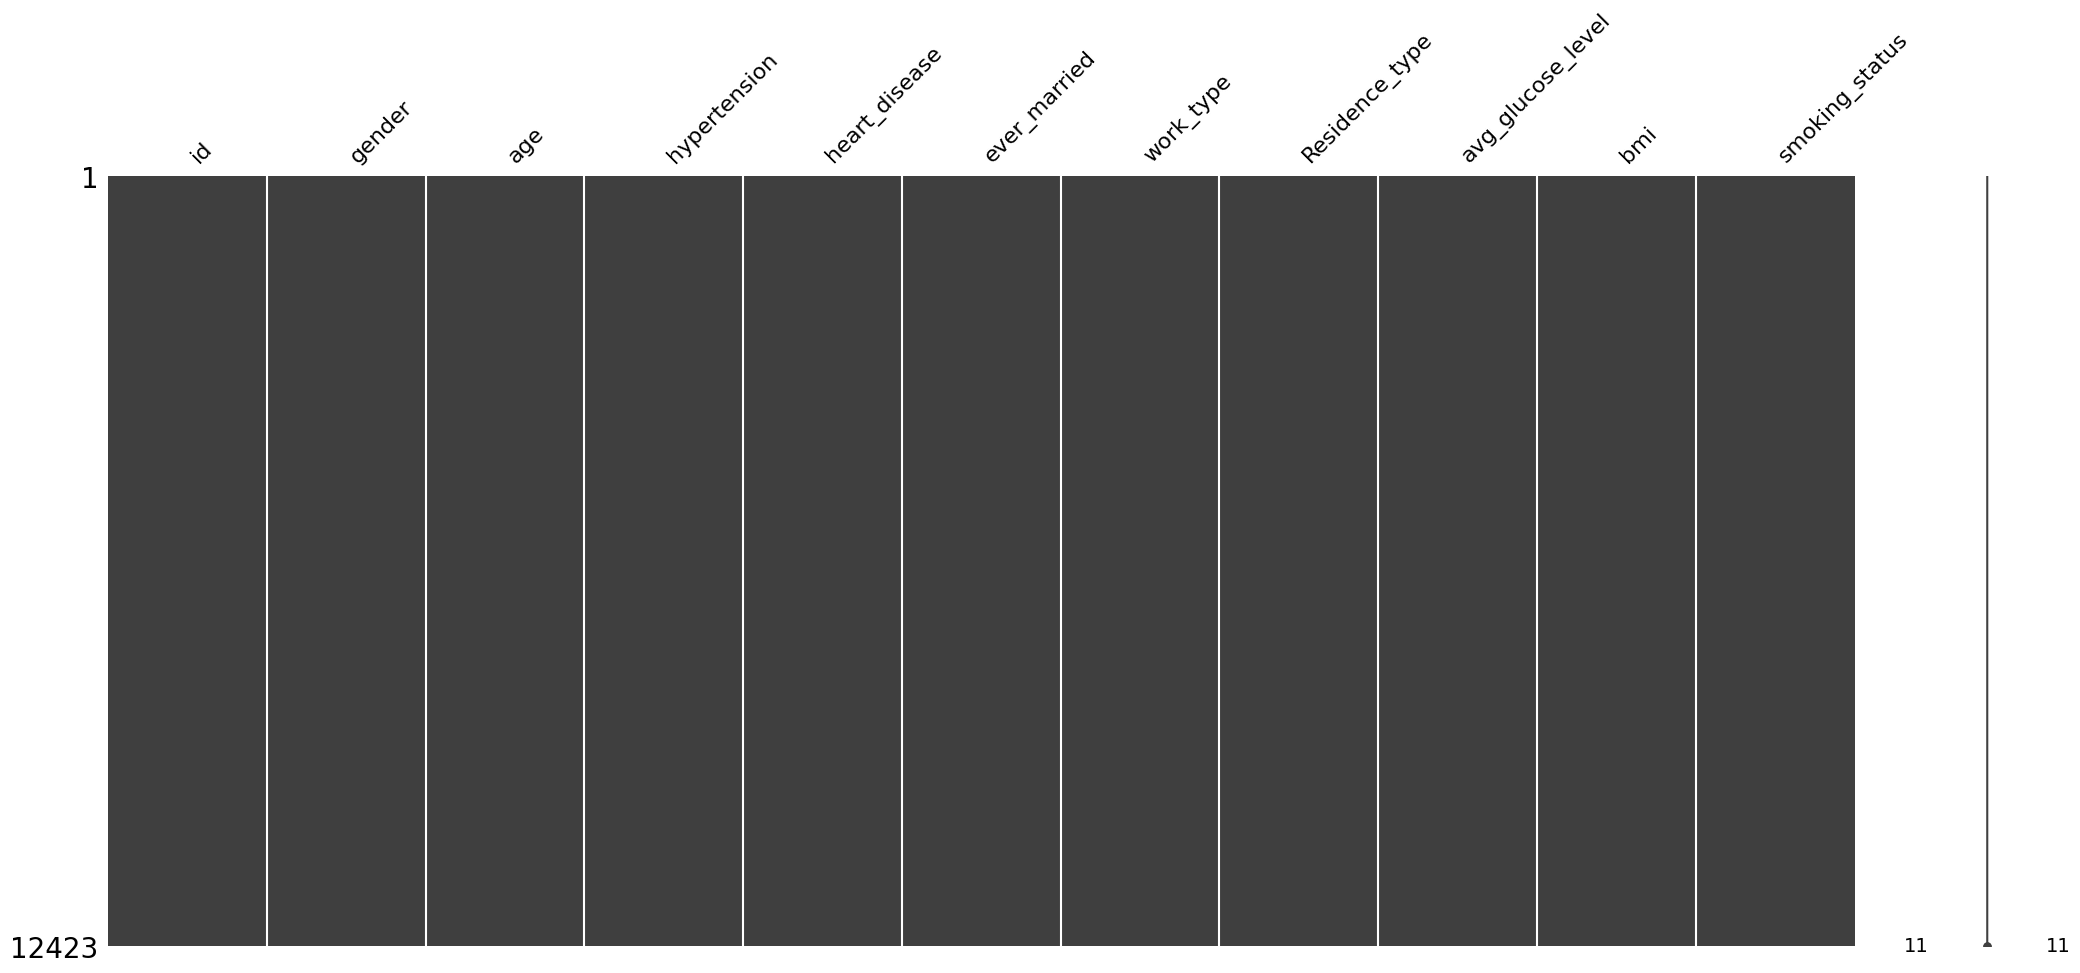

In [32]:
ms.matrix(test_data)


Pattern Recognition

In [33]:
train_data["stroke"].value_counts()


0    28524
1      548
Name: stroke, dtype: int64

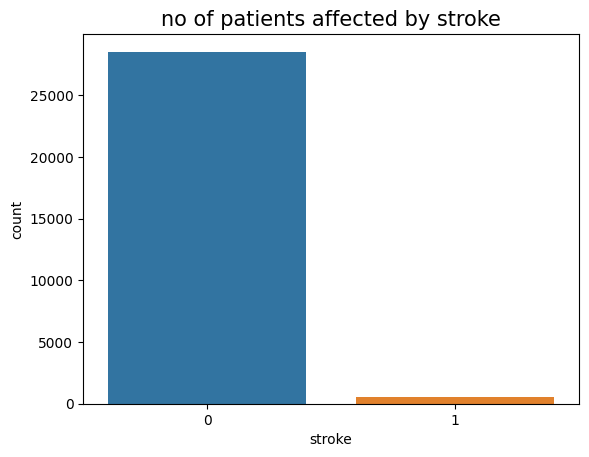

In [34]:
sns.countplot(x=train_data["stroke"])
plt.title("no of patients affected by stroke", fontsize=15)
plt.show()

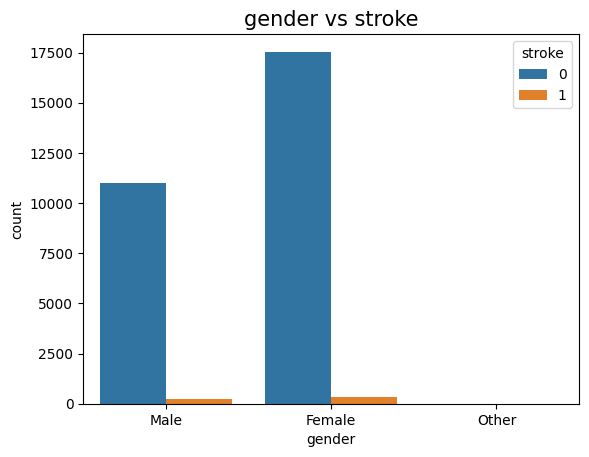

In [35]:
sns.countplot(x=train_data["gender"], hue=train_data["stroke"])
plt.title("gender vs stroke", fontsize=15)
plt.show()

In [36]:
train_data.groupby(["gender"])["stroke"].value_counts()


gender  stroke
Female  0         17539
        1           313
Male    0         10978
        1           235
Other   0             7
Name: stroke, dtype: int64

In [37]:
train_data["smoking_status"].value_counts()


never smoked       15747
formerly smoked     7099
smokes              6226
Name: smoking_status, dtype: int64

In [38]:
train_data.groupby(["smoking_status"])["stroke"].value_counts()


smoking_status   stroke
formerly smoked  0          6919
                 1           180
never smoked     0         15491
                 1           256
smokes           0          6114
                 1           112
Name: stroke, dtype: int64

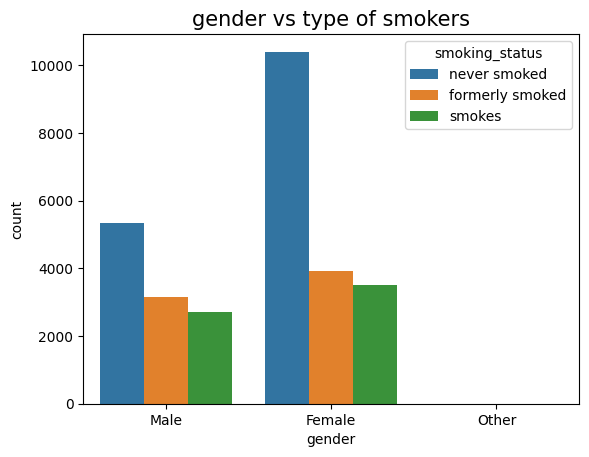

In [39]:
sns.countplot(x=train_data["gender"], hue=train_data["smoking_status"])
plt.title("gender vs type of smokers", fontsize=15)
plt.show()

Encoding data

In [40]:
str_data=train_data.select_dtypes(include=['object'])
str_dt=test_data.select_dtypes(include=['object'])

In [41]:
int_data=train_data.select_dtypes(include=['integer', 'float'])
int_dt=test_data.select_dtypes(include=['integer', 'float'])


In [42]:
from sklearn.preprocessing import LabelEncoder


In [43]:
label=LabelEncoder()
features=str_data.apply(label.fit_transform)
features=features.join(int_data)
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2,0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7,0
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0,0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3,0


In [44]:
test1=str_dt.apply(label.fit_transform)
Test=test1.join(int_dt)
Test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,0,36306,80.0,0,0,83.84,21.1
1,0,1,3,0,0,61829,74.0,0,1,179.50,26.0
4,0,1,0,0,1,40801,63.0,0,0,83.57,27.6
5,0,1,2,1,1,9348,66.0,1,0,219.98,32.2
7,1,1,0,1,1,60512,46.0,0,0,120.80,32.5


# Modeling & predicting the **data**

In [45]:
xtrain=features.drop(["stroke"],axis=1)
xtrain.shape

(29072, 11)

In [46]:
ytrain=features["stroke"]
ytrain.head()
ytrain.shape

(29072,)

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(xtrain, ytrain)

In [48]:
x_test.shape

(7268, 11)

In [49]:
y_test.shape

(7268,)

In [50]:
x_train.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
14628,0,0,2,0,1,33280,37.0,0,0,93.80,24.6
17895,1,1,3,1,2,70939,61.0,0,0,75.28,19.6
10614,1,1,2,0,0,48669,71.0,0,0,66.58,27.5
34892,1,1,2,1,2,51685,44.0,0,0,228.40,36.1
28149,0,1,3,0,0,40489,59.0,0,0,82.92,34.9


In [51]:
y_train.head()

14628    0
17895    0
10614    0
34892    0
28149    0
Name: stroke, dtype: int64

**Naive Bayes**

In [52]:
x_test.head()


,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
805,1,0,2,0,1,58037,21.0,0,0,78.52,27.2
31952,1,0,2,1,0,62918,40.0,0,0,63.29,29.7
5083,1,1,3,0,0,3820,77.0,0,0,88.75,31.9
12863,0,1,2,0,0,14684,65.0,0,0,244.95,36.1
21818,1,1,2,0,1,63056,78.0,1,0,90.04,25.6


In [53]:
y_test.head()


805      0
31952    0
5083     0
12863    0
21818    0
Name: stroke, dtype: int64

In [54]:
from sklearn.naive_bayes import GaussianNB


In [55]:
model=GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [56]:
predict=model.predict(x_test)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
test_score=model.score(x_test, y_test)
print("NBtest_score:", test_score)

NBtest_score: 0.9744083654375344


In [58]:
nb_conf_mtr=pd.crosstab(y_test, predict)
nb_conf_mtr

col_0,0,1
stroke,,
0,7077,61
1,125,5


In [59]:
from sklearn.metrics import classification_report

In [60]:
nbreport=classification_report(y_test, predict)
print(nbreport)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7138
           1       0.08      0.04      0.05       130

    accuracy                           0.97      7268
   macro avg       0.53      0.51      0.52      7268
weighted avg       0.97      0.97      0.97      7268



**Decision Tree**

In [61]:
from sklearn.tree import DecisionTreeClassifier


In [62]:
dt_mod=DecisionTreeClassifier(max_depth=8)
dt_mod.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [63]:
y_predict=dt_mod.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
ts_dt_score=dt_mod.score(x_test, y_test)
print("Decision tree test score:", ts_dt_score)

Decision tree test score: 0.9794991744634012


In [65]:
dectree_report=classification_report(y_test, y_predict)
print(dectree_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7138
           1       0.12      0.02      0.04       130

    accuracy                           0.98      7268
   macro avg       0.55      0.51      0.51      7268
weighted avg       0.97      0.98      0.97      7268



In [66]:
dt_conf_mtr=pd.crosstab(y_test, y_predict)
dt_conf_mtr

col_0,0,1
stroke,,
0,7116,22
1,127,3


**Random Forest**

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 100)

In [68]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [69]:
y_pred_rfc = rfc.predict(x_test)

In [70]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7138
           1       0.00      0.00      0.00       130

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.50      7268
weighted avg       0.96      0.98      0.97      7268



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
frst_cnf= pd.crosstab(y_test,y_pred_rfc)
print(frst_cnf)

col_0      0
stroke      
0       7138
1        130


**Multi-Layer Perceptron Classifier**

In [72]:
from sklearn.neural_network import MLPClassifier

In [73]:
mlp=MLPClassifier()

In [74]:
mlp.fit(x_train,y_train)

y_pred_mlp = mlp.predict(x_test)

In [75]:
mlp.score(x_test,y_test)

0.9821133736929004

In [76]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9757842475511938

In [77]:
cross_val_score(dt_mod,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9790521152934069

In [78]:
cross_val_score(rfc,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9811503212534707

In [79]:
cross_val_score(mlp,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9392994241388353

**Applying PCA**

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(xtrain)

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(xtrain, ytrain)

In [82]:
model_2=GaussianNB()
model_2.fit(x_train, y_train)

GaussianNB()

In [83]:
test_score=model_2.score(x_test, y_test)
print("NBtest_score:", test_score)

NBtest_score: 0.9753714914694551


In [84]:
dt_mod=DecisionTreeClassifier()
dt_mod.fit(x_train, y_train)

DecisionTreeClassifier()

In [85]:
ts_dt_score=dt_mod.score(x_test, y_test)
print("Decision tree test score:", ts_dt_score)

Decision tree test score: 0.9595487066593286


In [86]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [88]:
y_pred_rfc = rfc.predict(x_test)

In [89]:
print(pd.crosstab(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

col_0      0
stroke      
0       7132
1        136
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7132
           1       0.00      0.00      0.00       136

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.50      7268
weighted avg       0.96      0.98      0.97      7268



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
rfc.score(x_test,y_test)

0.9812878370941112

In [91]:
mlp=MLPClassifier()

mlp.fit(x_train,y_train)

y_pred_mlp = mlp.predict(x_test)

mlp.score(x_test,y_test)

0.9812878370941112

In [92]:
cross_val_score(model_2,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9757842475511938

In [93]:
cross_val_score(dt_mod,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9581380978121441

In [94]:
cross_val_score(rfc,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9811503212534707

In [95]:
cross_val_score(mlp,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9810127696716275